In [13]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style
style.use("ggplot")

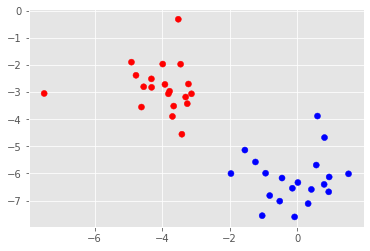

In [17]:
from sklearn.datasets import make_blobs
X,y =make_blobs(n_samples=40,centers=2,cluster_std=1)
plt.scatter(X[:,0],X[:,1],c=y, cmap="bwr")

In [27]:
# Support vector machine linear classifier
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X,y)

SVC(kernel='linear')

In [28]:
# Plot the decision boundaries
x_min = X[:,0].min()
x_max = X[:,0].max()
y_min = X[:,1].min()
y_max = X[:,1].max()


In [29]:
# Store decision boundaries in mesh grid
XX,YY =np.mgrid[x_min:x_max, y_min:y_max]

In [31]:
# Use the decision_function function to identify sides of the hyperplane
z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])

array([ 3.44818474,  3.89226637,  4.33634801,  4.78042965,  5.22451128,
        5.66859292,  6.11267455,  6.55675619,  2.51491248,  2.95899411,
        3.40307575,  3.84715738,  4.29123902,  4.73532066,  5.17940229,
        5.62348393,  1.58164022,  2.02572185,  2.46980349,  2.91388512,
        3.35796676,  3.80204839,  4.24613003,  4.69021167,  0.64836796,
        1.09244959,  1.53653123,  1.98061286,  2.4246945 ,  2.86877613,
        3.31285777,  3.7569394 , -0.28490431,  0.15917733,  0.60325897,
        1.0473406 ,  1.49142224,  1.93550387,  2.37958551,  2.82366714,
       -1.21817657, -0.77409493, -0.3300133 ,  0.11406834,  0.55814998,
        1.00223161,  1.44631325,  1.89039488, -2.15144883, -1.70736719,
       -1.26328556, -0.81920392, -0.37512229,  0.06895935,  0.51304099,
        0.95712262, -3.08472109, -2.64063945, -2.19655782, -1.75247618,
       -1.30839455, -0.86431291, -0.42023128,  0.02385036, -4.01799335,
       -3.57391171, -3.12983008, -2.68574844, -2.24166681, -1.79

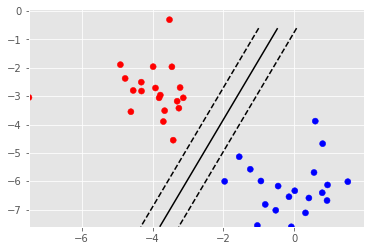

In [42]:
# Put the result into a color plot
z = z.reshape(XX.shape)
plt.contour(XX,YY,z,colors=['k'], levels=[-0.5,0,.5], linestyles=['--','-','--'])
plt.scatter(X[:,0],X[:,1],c=y, cmap="bwr")

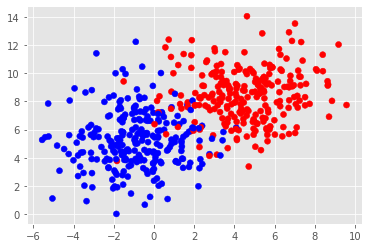

In [70]:
# Demonstrate that support vectors will sometimes cross the margin
X,y =make_blobs(n_samples=500,centers=2,cluster_std=2)
plt.scatter(X[:,0],X[:,1],c=y, cmap="bwr")

In [71]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(X,y)

In [72]:
# Fit to the training data and validate with the test data
model = SVC(kernel='linear')
model.fit(x_train, y_train)
predictions = model.predict(x_test)
predictions

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1])

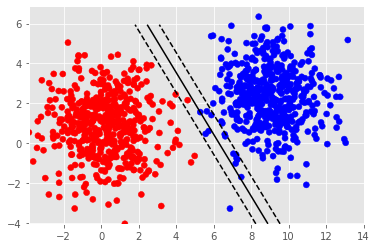

In [98]:
# Plot the decision boundaries - boilerplate code, just copy and paste this!
x_min = X[:,0].min()
x_max = X[:,0].max()
y_min = X[:,1].min()
y_max = X[:,1].max()
# Store decision boundaries in mesh grid
XX,YY =np.mgrid[x_min:x_max, y_min:y_max]
z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])
z = z.reshape(XX.shape)
plt.contour(XX,YY,z,colors=['k'], levels=[-0.5,0,.5], linestyles=['--','-','--'])
plt.scatter(X[:,0],X[:,1],c=y, cmap="bwr")

In [81]:
# Calculate classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, predictions, target_names=['blue','red'])

In [75]:
print(report)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        64
           1       0.97      0.93      0.95        61

    accuracy                           0.95       125
   macro avg       0.95      0.95      0.95       125
weighted avg       0.95      0.95      0.95       125



In [87]:
p = model.predict([[4,2]])

In [91]:
print(classification_report([y_test], p, target_names=['blue','red']))

ValueError: Number of classes, 1, does not match size of target_names, 2. Try specifying the labels parameter

array([0])

In [95]:
predictions = model.predict(X)
print(classification_report(y, predictions, target_names=['blue','red']))

              precision    recall  f1-score   support

        blue       0.93      0.96      0.94       250
         red       0.95      0.93      0.94       250

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



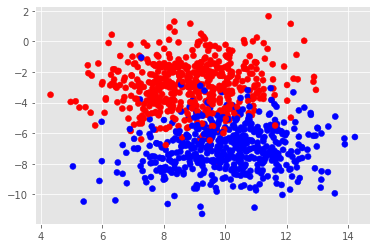

In [104]:
X,y =make_blobs(n_samples=1000,centers=2,cluster_std=1.5)
plt.scatter(X[:,0],X[:,1],c=y, cmap="bwr")

In [105]:
predictions = model.predict(X)
print(classification_report(y, predictions, target_names=['blue','red']))

              precision    recall  f1-score   support

        blue       0.01      0.00      0.00       500
         red       0.42      0.73      0.53       500

    accuracy                           0.36      1000
   macro avg       0.21      0.36      0.27      1000
weighted avg       0.21      0.36      0.27      1000



In [106]:
model.__dict__

{'decision_function_shape': 'ovr',
 'break_ties': False,
 'kernel': 'linear',
 'degree': 3,
 'gamma': 'scale',
 'coef0': 0.0,
 'tol': 0.001,
 'C': 1.0,
 'nu': 0.0,
 'epsilon': 0.0,
 'shrinking': True,
 'probability': False,
 'cache_size': 200,
 'class_weight': None,
 'verbose': False,
 'max_iter': -1,
 'random_state': None,
 '_sparse': False,
 'n_features_in_': 2,
 'class_weight_': array([1., 1.]),
 'classes_': array([0, 1]),
 '_gamma': 0.024307991533800963,
 'support_': array([149, 913, 891]),
 'support_vectors_': array([[-1.85089776,  0.98893806],
        [-6.00512821,  1.75407604],
        [-2.91952552, -0.68867009]]),
 '_n_support': array([2, 1]),
 'dual_coef_': array([[-0.4844484 , -0.10412034,  0.58856875]]),
 'intercept_': array([-0.30814963]),
 '_probA': array([], dtype=float64),
 '_probB': array([], dtype=float64),
 'fit_status_': 0,
 'shape_fit_': (1000, 2),
 '_intercept_': array([0.30814963]),
 '_dual_coef_': array([[ 0.4844484 ,  0.10412034, -0.58856875]])}